In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_master = pd.read_excel("master_file_final.xlsx")
df_appts = pd.read_excel("allapptslinac2010-2020.xlsx")

In [4]:
df_emergency = df_master[df_master['Category_x']=='Planned Delay 3']
df_emergency['Year'] = df_emergency['CreatedDate'].dt.year
df_emergency['Month'] = df_emergency['CreatedDate'].dt.month
# create YearMonth column
df_emergency['dateInt']= df_emergency['Year'].astype(str) + df_emergency['Month'].astype(str).str.zfill(2)
df_emergency['YearMonth'] = pd.to_datetime(df_emergency['dateInt'], format='%Y%m')
df_emergency

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,MRN,CreatedDate,CreatedTime,ActivatedDate,ActivatedTime,SiteGroup,Diagnosis,Category_x,PlanCreateDate,PlanCreateTime,...,Tx-TxBook,Tx-PlanCompl,Tx-PlanPrompt,Tx-PlanReview,PlanWait,Unnamed: 86,Year,Month,dateInt,YearMonth
9,9284,2012-12-19,1999-11-30 11:24:38,2012-12-19,1999-11-30 11:26:59,GYNAE,Uterine,Planned Delay 3,2012-12-19,1999-11-30 11:25:30,...,11,NaN,NaN,NaN,NaN,NaN,2012,12,201212,2012-12-01
20,19009,2014-07-09,1999-11-30 13:59:00,2014-07-09,1999-11-30 14:07:07,ENT (HEAD & NECK),Oral Cavity,Planned Delay 3,2014-07-09,1999-11-30 14:03:22,...,18,NaN,NaN,NaN,NaN,NaN,2014,7,201407,2014-07-01
27,24105,2020-05-29,1999-11-30 15:39:28,2020-05-29,1999-11-30 15:42:10,BREAST,"Ca Breast, Upper-outer Quadrant",Planned Delay 3,2020-05-29,1999-11-30 15:41:19,...,6,NaN,NaN,NaN,NaN,NaN,2020,5,202005,2020-05-01
30,25735,2011-02-22,1999-11-30 16:09:11,2011-02-22,1999-11-30 16:17:01,GI UPPER,NaN,Planned Delay 3,2011-02-22,1999-11-30 16:12:55,...,1,NaN,NaN,NaN,NaN,NaN,2011,2,201102,2011-02-01
33,28326,2011-09-12,1999-11-30 10:52:38,2011-09-12,1999-11-30 10:56:57,BREAST,"Ca Breast, Axillary Tail",Planned Delay 3,2011-09-12,1999-11-30 10:55:16,...,9,NaN,NaN,NaN,NaN,NaN,2011,9,201109,2011-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57733,6264228,2012-06-20,1999-11-30 15:38:07,2012-06-20,1999-11-30 15:39:30,LYMPHOMA,U: MDS,Planned Delay 3,2012-06-20,1999-11-30 15:39:03,...,26,NaN,NaN,NaN,NaN,NaN,2012,6,201206,2012-06-01
57737,6276053,2010-11-05,1999-11-30 13:27:04,2010-11-05,1999-11-30 13:40:52,GI UPPER,Ca Esophagus,Planned Delay 3,2010-11-05,1999-11-30 13:30:23,...,3,NaN,NaN,NaN,NaN,NaN,2010,11,201011,2010-11-01
57742,6299006,2013-04-30,1999-11-30 14:36:18,2013-04-30,1999-11-30 14:54:19,GI UPPER,Ca Stomach,Planned Delay 3,2013-04-30,1999-11-30 14:36:57,...,42,NaN,NaN,NaN,NaN,NaN,2013,4,201304,2013-04-01
57743,6299380,2014-03-10,1999-11-30 16:15:32,2014-03-10,1999-11-30 16:17:24,LYMPHOMA,U: MDS,Planned Delay 3,2014-03-10,1999-11-30 16:16:33,...,22,NaN,NaN,NaN,NaN,NaN,2014,3,201403,2014-03-01


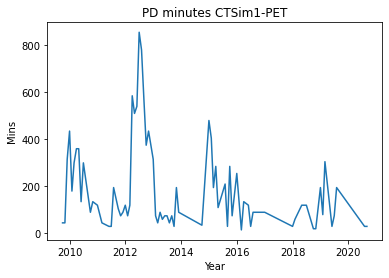

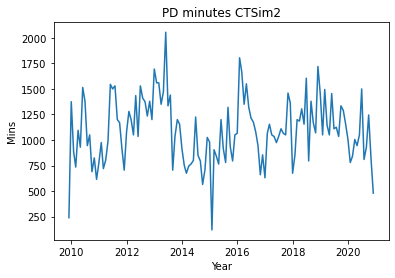

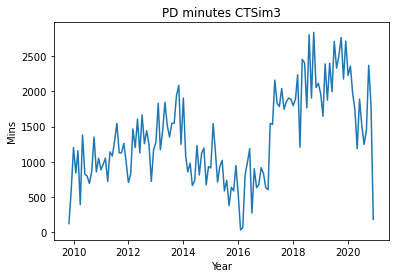

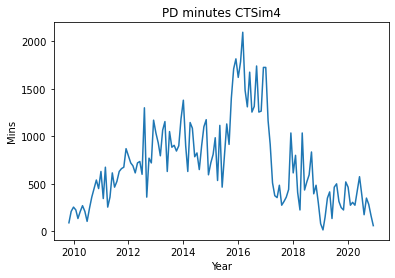

In [6]:
### CTs mins booked on each CT for planned delay patients
df_CTmins = df_emergency.groupby([df_emergency['SimLocation'],df_emergency['YearMonth']]
                                )['SimApptDuration'].agg('sum').reset_index()
                                                                                                            
CTs = df_CTmins['SimLocation'].unique()
for u in CTs:
    y = df_CTmins[df_CTmins['SimLocation']==u]['SimApptDuration']
    x = df_CTmins[df_CTmins['SimLocation']==u]['YearMonth']

    plt.plot(x, y)
    plt.xlabel('Year')
    plt.ylabel('Mins')
    plt.title('PD minutes every month'+u)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()

In [54]:
df_CTmins
# momthly total minutes on CTs

,SimLocation,YearMonth,SimApptDuration
0,CTSim1-PET,2009-10-01,45
1,CTSim1-PET,2009-11-01,45
2,CTSim1-PET,2009-12-01,315
3,CTSim1-PET,2010-01-01,435
4,CTSim1-PET,2010-02-01,180
...,...,...,...
472,CTSim4,2020-08-01,175
473,CTSim4,2020-09-01,350
474,CTSim4,2020-10-01,285
475,CTSim4,2020-11-01,165


In [10]:
df_CT_recent_total = df_CTmins[(df_CTmins['YearMonth']>='2018-06-01')&(df_CTmins['YearMonth']<='2018-09-01')]
df_CT_recent_mean = df_CT_recent.groupby(['SimLocation']).agg('mean').reset_index()
df_CT_recent_mean['dailyReserve']=df_CT_recent_mean['SimApptDuration']/20
df_CT_recent_mean
# total mins and daily mins to be reserved


,SimLocation,SimApptDuration,dailyReserve
0,CTSim1-PET,120.00,6.0000
1,CTSim2,1233.75,61.6875
2,CTSim3,2220.00,111.0000
3,CTSim4,596.25,29.8125


In [55]:
df_appts

,MRN,TxUnit,ApptStatus,Duration,ApptDate,ApptTime_o,ApptTime_i,ApptTime,Year,Month
0,99.0,WV16,NaN,30.0,2019-08-13,14:50:00,14:50:00,14:50:00,2019.0,8.0
1,2918.0,SA04,C,15.0,2015-12-28,19:15:00,19:15:00,19:15:00,2015.0,12.0
2,2918.0,WA15,FC,15.0,2015-12-29,14:20:00,14:20:00,14:20:00,2015.0,12.0
3,5723.0,NA10,"SC,S",30.0,2013-08-07,11:10:00,11:10:00,11:10:00,2013.0,8.0
4,5723.0,NA10,C,15.0,2013-08-08,8:45,08:45:00,08:45:00,2013.0,8.0
...,...,...,...,...,...,...,...,...,...,...
561573,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.548611,NaN,NaN
561574,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.5,NaN,NaN
561575,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.583333,NaN,NaN
561576,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.534722,NaN,NaN


In [45]:
df_appts['Year'] = df_appts['ApptDate'].dt.year
df_appts['Month'] = df_appts['ApptDate'].dt.month
df_totalmins = df_appts.groupby([df_appts['MRN'],df_appts['TxUnit'],df_appts['Year'],df_appts['Month']]
                               )['Duration'].agg('sum').reset_index()
# every patient, total mins on each machine per month
df_totalmins['Year']=df_totalmins['Year'].astype(int)
df_totalmins['Month']=df_totalmins['Month'].astype(int)
# create YearMonth column
df_totalmins['dateInt']= df_totalmins['Year'].astype(str) + df_totalmins['Month'].astype(str).str.zfill(2)
df_totalmins['YearMonth'] = pd.to_datetime(df_totalmins['dateInt'], format='%Y%m')
df_totalmins.head()

,MRN,TxUnit,Year,Month,Duration,dateInt,YearMonth
0,99.0,WV16,2019,8,30.0,201908,2019-08-01
1,2918.0,SA04,2015,12,15.0,201512,2015-12-01
2,2918.0,WA15,2015,12,15.0,201512,2015-12-01
3,5723.0,NA10,2013,8,285.0,201308,2013-08-01
4,5723.0,NA10,2013,9,270.0,201309,2013-09-01


In [56]:
df_totalmins[df_totalmins['Year']==2020]

,MRN,TxUnit,Year,Month,Duration,dateInt,YearMonth
24,12169.0,NA12,2020,9,25.0,202009,2020-09-01
25,12169.0,WA15,2020,9,280.0,202009,2020-09-01
44,22300.0,NA10,2020,10,30.0,202010,2020-10-01
45,22300.0,NA12,2020,8,90.0,202008,2020-08-01
46,22300.0,NA12,2020,10,30.0,202010,2020-10-01
...,...,...,...,...,...,...,...
86305,6389343.0,NA12,2020,3,135.0,202003,2020-03-01
86323,6392032.0,EA05,2020,8,80.0,202008,2020-08-01
86324,6392032.0,NA09,2020,7,20.0,202007,2020-07-01
86325,6392032.0,SA04,2020,7,290.0,202007,2020-07-01


In [48]:
df_totalmins.sort_values(by=['YearMonth'])

,MRN,TxUnit,Year,Month,Duration,dateInt,YearMonth
38657,3976352.0,SV01,2011,10,30.0,201110,2011-10-01
10346,1274697.0,SV01,2011,10,60.0,201110,2011-10-01
38718,3978766.0,SV01,2011,10,60.0,201110,2011-10-01
29313,3271421.0,SV01,2011,10,15.0,201110,2011-10-01
38682,3977031.0,SV01,2011,10,15.0,201110,2011-10-01
...,...,...,...,...,...,...,...
28325,3208824.0,WU14,2020,12,300.0,202012,2020-12-01
5180,759704.0,WA15,2020,12,120.0,202012,2020-12-01
79328,4685217.0,EA07,2020,12,20.0,202012,2020-12-01
5131,753890.0,WA15,2020,12,20.0,202012,2020-12-01


In [23]:
df_totalmins

(86327, 7)

In [13]:
df_PDMins = df_totalmins.merge(df_emergency, on=['MRN','YearMonth'])

In [50]:
df_PDMins[['MRN','Category_x','Duration','TxUnit_x','YearMonth']].sort_values(by=['YearMonth'])
# total mins every month per unit

,MRN,Category_x,Duration,TxUnit_x,YearMonth
279,1274697.0,Planned Delay 3,60.0,SV01,2011-10-01
36,282624.0,Planned Delay 3,75.0,SV01,2011-10-01
975,3985026.0,Planned Delay 3,30.0,SV01,2011-12-01
954,3953621.0,Planned Delay 3,30.0,SV01,2011-12-01
609,2926613.0,Planned Delay 3,35.0,SV01,2012-02-01
...,...,...,...,...,...
2296,4785215.0,Planned Delay 3,20.0,NA09,2020-12-01
138,827450.0,Planned Delay 3,165.0,EA05,2020-12-01
2279,4757768.0,Planned Delay 3,145.0,WA17,2020-12-01
2304,4803668.0,Planned Delay 3,170.0,SA04,2020-12-01


In [51]:
df_PD_mins_unit = df_PDMins.groupby([df_PDMins['TxUnit_x'], df_PDMins['YearMonth']]
                                      )['Duration'].agg('sum').reset_index()
df_PD_mins_unit # total mins per unit per month

,TxUnit_x,YearMonth,Duration
0,EA05,2013-11-01,70.0
1,EA05,2013-12-01,80.0
2,EA05,2014-01-01,190.0
3,EA05,2014-02-01,30.0
4,EA05,2014-04-01,160.0
...,...,...,...
893,WV16,2020-03-01,15.0
894,WV16,2020-04-01,260.0
895,WV16,2020-08-01,30.0
896,WV16,2020-09-01,170.0


In [52]:
# avg time of planned delay 3 on each linac
df_linac_recent = df_PD_mins_unit[(df_PD_mins_unit['YearMonth']>='2020-01-01')&
                                  (df_PD_mins_unit['YearMonth']<'2020-03-01')]
df_linac_recent


,TxUnit_x,YearMonth,Duration
49,EA05,2020-01-01,220.0
50,EA05,2020-02-01,215.0
109,EA07,2020-02-01,165.0
179,EA08,2020-02-01,160.0
213,EV06,2020-01-01,385.0
214,EV06,2020-02-01,85.0
276,NA09,2020-01-01,80.0
277,NA09,2020-02-01,200.0
339,NA10,2020-01-01,195.0
340,NA10,2020-02-01,195.0


In [53]:
df_avg_PD = df_linac_recent.groupby(df_linac_recent['TxUnit_x'])['Duration'].agg('mean').reset_index()
# monthly average ( avg of 2 months)
df_avg_PD['dailyReserve']=df_avg_PD['Duration']/20
df_avg_PD # avg monthly mins per unit and daily mins to be reserved

,TxUnit_x,Duration,dailyReserve
0,EA05,217.5,10.875
1,EA07,165.0,8.250
2,EA08,160.0,8.000
3,EV06,235.0,11.750
4,NA09,140.0,7.000
5,NA10,195.0,9.750
6,NA11,105.0,5.250
7,NA12,420.0,21.000
8,SA04,132.5,6.625
9,SV01,117.5,5.875


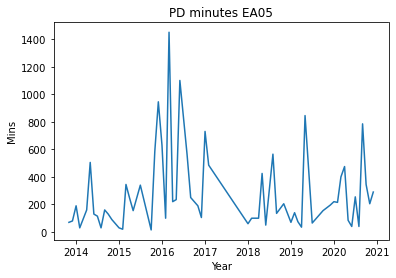

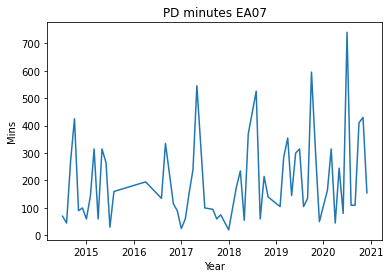

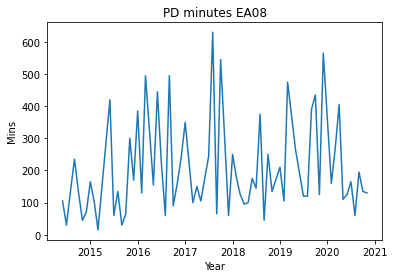

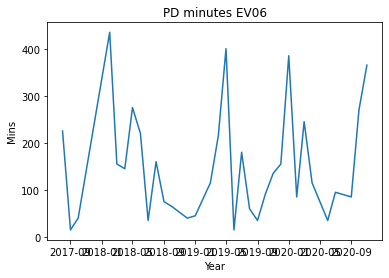

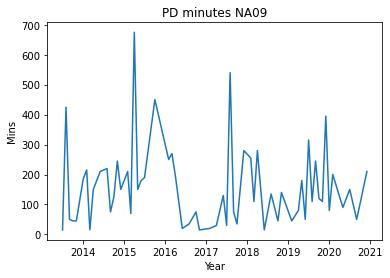

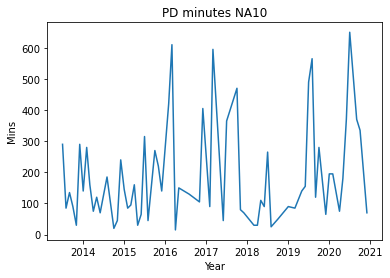

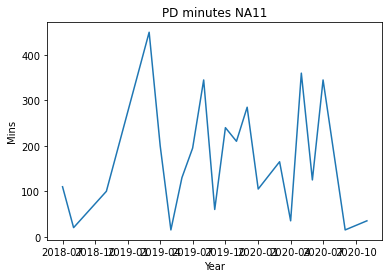

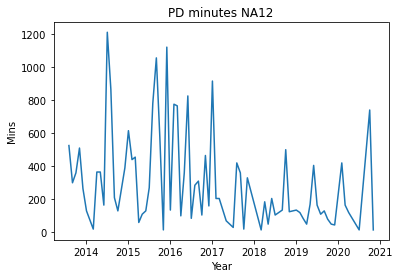

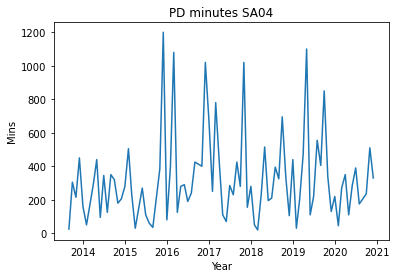

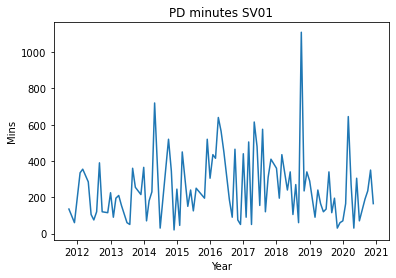

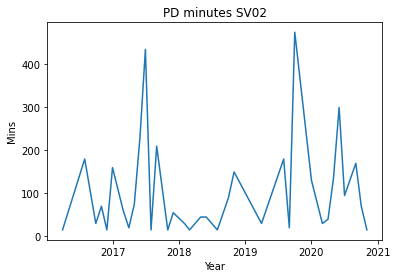

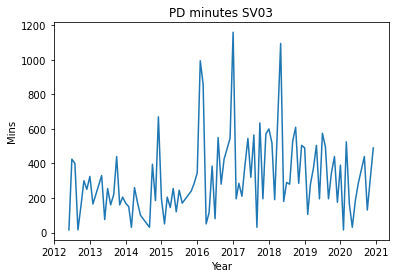

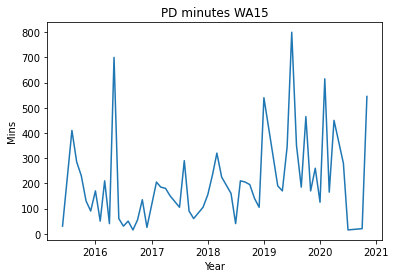

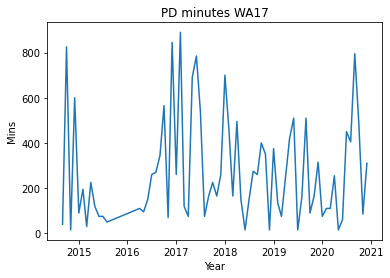

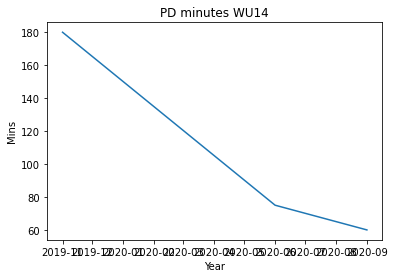

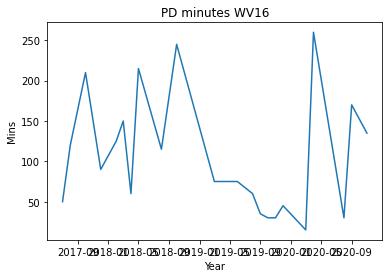

In [9]:
units = df_E1_mins_unit['TxUnit_x'].unique()
for u in units:
    y = df_E1_mins_unit[df_E1_mins_unit['TxUnit_x']==u]['Duration']
    x = df_E1_mins_unit[df_E1_mins_unit['TxUnit_x']==u]['YearMonth']

    plt.plot(x, y)
    plt.xlabel('Year')
    plt.ylabel('Mins')
    plt.title('PD minutes '+u)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()